In [78]:
import numpy as np
import pandas as pd
from fastparquet import ParquetFile
from fastparquet import write
import pyarrow.parquet as pq

import matplotlib as mpl
import matplotlib.pyplot as plt


#mayplotlib graphs will be included in the notebook
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

import sys
path = '/Users/mithursan/data'
sys.path.append('../src')

In [101]:
def prepare_data_kibot(raw_data_path, out_data_path):
    df = pd.read_csv(raw_data_path,
                    header=None,
                    names=['day', 'time', 'price', 'bid', 'ask', 'vol'])
    df['date'] = pd.to_datetime(df['day'] + df['time'],
                               format = '%m/%d/%Y%H:%M:%S')
    df['dollar_vol'] = df['price']*df['vol']
    df = df.set_index('date')
    df = df.drop(['day', 'time'],
                axis=1)
    df = df.drop_duplicates()
    #df = df.to_parquet(out_data_path)
    write(out_data_path, df)
    #write('WDC_tickbidask.parq', df)

In [105]:
raw_data_path = '/Users/mithursan/data/raw/IVE_tickbidask.txt'
out_data_path = '/Users/mithursan/IVE_tickbidask.parq'
prepare_data_kibot(raw_data_path, out_data_path)

In [112]:
raw_data_path = '/Users/mithursan/data/raw/WDC_tickbidask.txt'
out_data_path = '/Users/mithursan/WDC_tickbidask.parq'
prepare_data_kibot(raw_data_path, out_data_path)


In [119]:
# Data Cleaning
from fastparquet import ParquetFile
out_data_path = '/Users/mithursan/IVE_tickbidask.parq'
pf = ParquetFile(out_data_path)
df = pf.to_pandas()

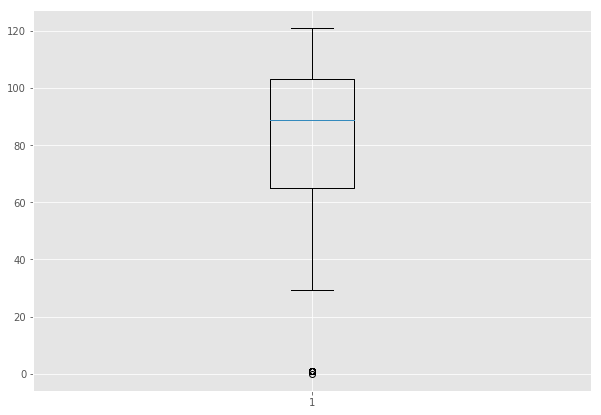

In [120]:
fig, ax = plt.subplots()
_ = ax.boxplot(df.price)

In [117]:
from fastparquet import ParquetFile
out_data_path = '/Users/mithursan/WDC_tickbidask.parq'
pf = ParquetFile(out_data_path)
df = pf.to_pandas()

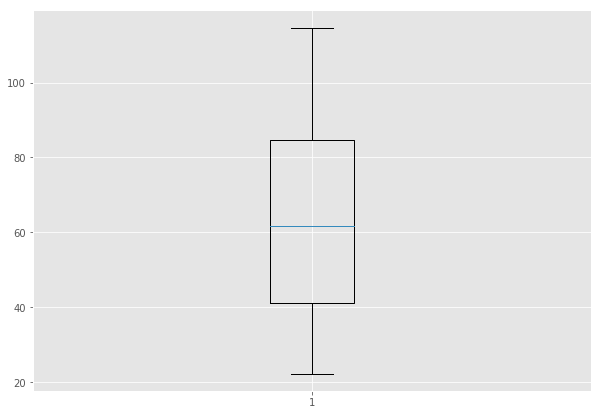

In [118]:
fig, ax = plt.subplots()
_ = ax.boxplot(df.price)

In [113]:
# Data Loading
from fastparquet import ParquetFile
out_data_path = '/Users/mithursan/WDC_tickbidask.parq'
pf = ParquetFile(out_data_path)
df = pf.to_pandas()

In [114]:
df.head()

,price,bid,ask,vol,dollar_vol
date,,,,,
2010-02-17 09:30:01,42.8700,42.70,43.01,1161,49772.07
2010-02-17 09:30:10,42.8700,42.70,42.98,116,4972.92
2010-02-17 09:30:12,42.9400,42.78,42.95,25800,1107852.00
2010-02-17 09:30:12,42.9400,42.78,42.94,9,386.46
2010-02-17 09:30:12,42.9384,42.84,42.93,300,12881.52


In [115]:
# Data Loading
from fastparquet import ParquetFile
out_data_path = '/Users/mithursan/IVE_tickbidask.parq'
pf = ParquetFile(out_data_path)
df = pf.to_pandas()

In [116]:
df.head()

,price,bid,ask,vol,dollar_vol
date,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,15225.00
